<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_GPT_%ED%92%80%EC%9D%B46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('auto_mpg.csv')

,mpg
0,13.0


In [21]:
#1
df['horsepower_qcut'] = pd.qcut(x=df['horsepower'], q=3, labels=['낮음','보통','높음'])
df['horsepower_qcut'].value_counts()

,count
horsepower_qcut,
낮음,170
보통,170
높음,166


In [28]:
#2 - b
#3
pd.qcut(x=df['mpg'], q=4, labels=['아주낮음','낮음','높음','아주높음'])
#4 - B
#5
df['weight_cut'] = pd.cut(df['weight'], bins=5, labels=[1,2,3,4,5])
df.groupby('weight_cut')['mpg'].mean()

,mpg
weight_cut,
1,31.230732
2,31.622881
3,25.825913
4,15.095238
5,12.791667


In [30]:
#6 - B
#7
df['displacement_cut'] = pd.cut(df['displacement'], bins=4, labels=['낮음','중간','높음','최고높음'])
df.groupby('displacement_cut')['cylinders'].mean()

/tmp/ipython-input-30-2673928618.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('displacement_cut')['cylinders'].mean()


,cylinders
displacement_cut,
낮음,4.139130
중간,5.619048
높음,7.972222
최고높음,8.000000


In [44]:
import numpy as np
#8 - C
#9 - 구간이 4갠데 labels이 3개임.
#10
df['mpg_cut'] = pd.cut(df['mpg'], bins=10, labels=[1,2,3,4,5,6,7,8,9,10])
df['mpg_cut'].value_counts().sort_index()

,count
mpg_cut,
1,70
2,113
3,145
4,74
5,41
6,9
7,2
8,13
9,16


In [47]:
df = pd.read_csv('auto_mpg.csv')
df.select_dtypes(include=['number'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1
...,...,...,...,...,...,...,...,...
503,NaN,8.0,NaN,159.86,3645.17,22.23,71.0,1
504,NaN,NaN,NaN,183.61,3201.03,12.63,76.0,1
505,12.07,6.0,NaN,126.84,3443.07,24.24,74.0,1
506,NaN,NaN,110.29,147.59,3541.82,NaN,NaN,3


<Figure size 640x480 with 0 Axes>

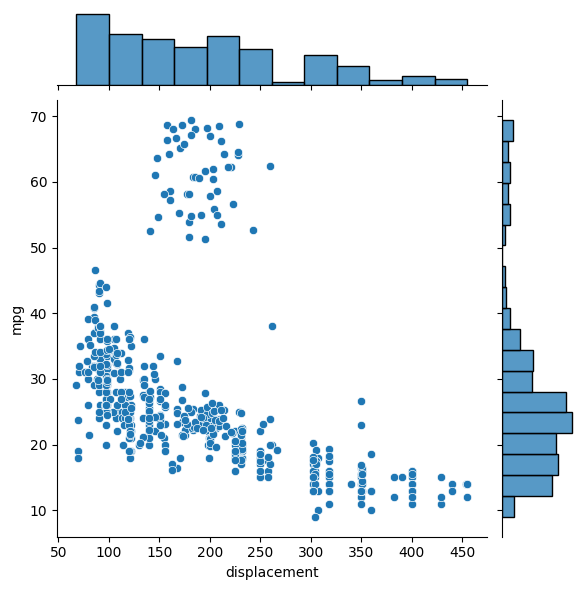

In [49]:
#1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.jointplot(data=df ,x='displacement', y='mpg')
plt.show()

In [50]:
#2
df_cleaned = df[df['displacement'] <= 400]
df_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8.0,307.00,130.00,3504.00,12.00,70.0,1,chevrolet chevelle malibu
1,15.00,8.0,350.00,165.00,3693.00,11.50,70.0,1,buick skylark 320
2,18.00,8.0,318.00,150.00,3436.00,11.00,70.0,1,plymouth satellite
3,16.00,8.0,304.00,150.00,3433.00,12.00,70.0,1,amc rebel sst
4,17.00,8.0,302.00,140.00,3449.00,10.50,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
497,54.99,6.0,191.03,106.39,3405.69,14.96,78.0,2,eco model 470
498,23.11,6.0,253.07,NaN,2151.01,14.08,75.0,1,missing model 899
500,NaN,NaN,271.14,121.63,2409.97,NaN,70.0,1,missing model 911
501,NaN,NaN,184.28,176.27,2518.85,18.85,NaN,1,missing model 325


In [52]:
#3
df_cleaned.isnull().sum()
df_no_na = df_cleaned.dropna(how='any',axis=0)

In [62]:
#4
df_no_na['horsepower'] = df_no_na['horsepower'].astype(int)

print((df_no_na['horsepower'].dtype))

int64


/tmp/ipython-input-62-3661038561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['horsepower'] = df_no_na['horsepower'].astype(int)


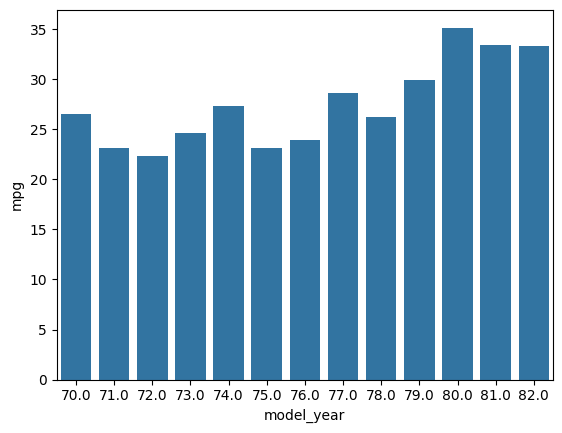

In [68]:
#5
plt.figure()
sns.barplot(df_no_na.groupby('model_year')['mpg'].mean())
plt.show()

In [91]:
#6
df_encoded = pd.get_dummies(df_no_na, columns=['origin'])

In [92]:
#7
df_heavy = df_encoded[df_encoded['weight'] >= df_encoded['weight'].quantile(0.9)]
len(df_heavy)

49

In [93]:
#8
df_encoded.drop('name', axis=1, inplace=True)

X = df_encoded.drop('mpg', axis=1)
y = df_encoded['mpg']

#9
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [97]:
#10
df_ford = df[df['name'].str.contains('ford', case=False)]
print(len(df_ford))

51


In [99]:
#1, 2
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(max_depth = 4, min_samples_split=3, random_state=0)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators = 150, max_depth = 6, min_samples_split=4, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=150,
                      random_state=0)

In [100]:
#3
y_pred_tree = dt.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

#4
from sklearn.metrics import mean_absolute_error
mae_tree = mean_absolute_error(y_valid, y_pred_tree)
mea_rf = mean_absolute_error(y_valid, y_pred_rf)

In [102]:
#5
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train[['horsepower','weight','acceleration']], y_train)
print(lr.coef_, lr.intercept_)

[-0.02850322 -0.00635805 -0.126495  ] 51.181714001518145


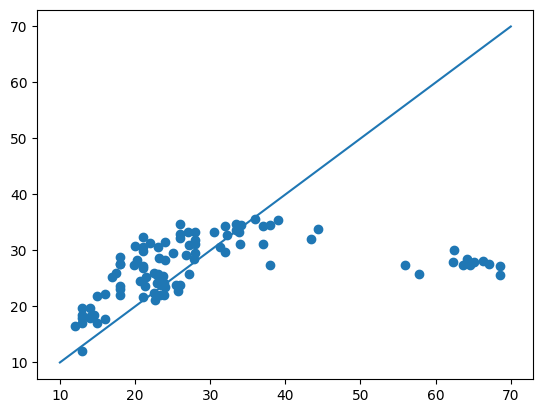

In [105]:
#6
import matplotlib.pyplot as plt

lr_pred = lr.predict(X_valid[['horsepower','weight','acceleration']])

plt.figure()
plt.scatter(x = y_valid, y = lr_pred)
plt.plot([10,70], [10,70])
plt.show()

<Axes: xlabel='origin', ylabel='mpg'>

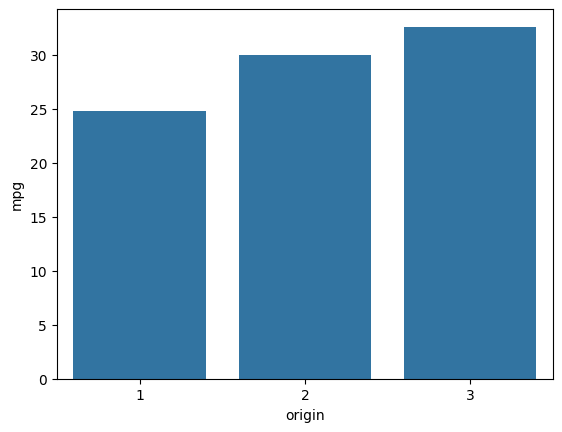

In [108]:
#7
df_ogm = df.groupby('origin')['mpg'].mean().reset_index()
sns.barplot(data = df_ogm, x='origin', y='mpg')

In [112]:
#8
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_shape = (X_train.shape[1], ), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=8,
          validation_data = (X_valid, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 994.6290 - val_loss: 454.4807
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 421.4335 - val_loss: 360.0551
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 300.0005 - val_loss: 424.3506
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 289.1158 - val_loss: 283.4474
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 181.2659 - val_loss: 304.3502
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 178.4291 - val_loss: 239.7314
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215.7376 - val_loss: 227.9451
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 229.7849 - val_loss: 224.4163
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 175.2781 - val_loss: 220.4527
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 160.2767 - val_loss: 219.5662
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 164.0080 - val_loss: 217.1942
Epoch 12/50
49/49 ━━━━━━━

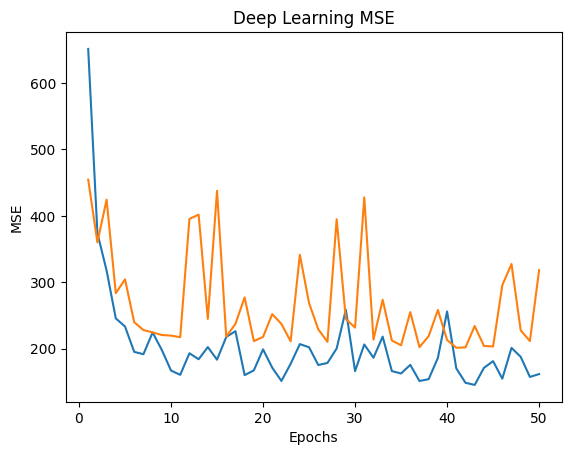

In [124]:
#9
plt.figure()
sns.lineplot(x = range(1, len(history.history['loss'])+1), y = history.history['loss'])
sns.lineplot(x = range(1, len(history.history['val_loss'])+1), y = history.history['val_loss'])
plt.title("Deep Learning MSE")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [122]:
#10
df_chev = df[df['name'].str.contains('chevrolet', case=False)]
print(df_chev['mpg'].mean(), df_chev['mpg'].std())

20.472093023255812 6.182822809680263
